In [1]:
from copyreg import dispatch_table
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


class State(TypedDict):
    graph_state: str


def node1(state: State):
    return {"graph_state": str(state['graph_state']) + "in node1"}


def node2(state: State):
    return {"graph_state": str(state['graph_state']) + " in node2"}


def node3(state):
    return {"graph_state": str(state['graph_state']) + " in node3"}


def node4(state):
    return {"graph_state": str(state['graph_state']) + " in node 4"}


def node5(state):
    return {"graph_state": str(state['graph_state']) + " in node 5"}



In [2]:
from typing import Literal
# Decision making which route to take
from random import random

def dec_mod1(state: State) -> Literal ["node4" , "node3"]:
    rand = random()
    if rand < 0.7:
        # take node 2
        print("Case 1")
        return "node4"
    else:
        print("Case 2")
        return "node3"


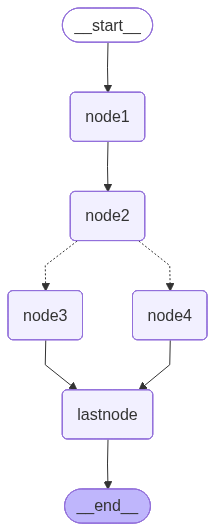

In [3]:
from IPython.core.display import Image

g = StateGraph(State)

g.add_node("node1", node1)
g.add_node("node2", node2)
g.add_node("node3", node3)
g.add_node("node4", node4)
g.add_node("lastnode", node5)

g.add_edge(START, "node1")
g.add_edge("node1", "node2")
g.add_conditional_edges("node2", dec_mod1)
g.add_edge("node4", "lastnode")
g.add_edge("node3", "lastnode")
g.add_edge("lastnode", END)

graph = g.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
graph.invoke({"graph_state":"Hi I am Vijay"})

Case 2


{'graph_state': 'Hi I am Vijayin node1 in node2 in node3 in node 5'}